## Chess (King-Rook vs. King-Pawn)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Chess (King-Rook vs. King-Pawn) Data Set/kr-vs-kp.data', header=None)
df.columns = ['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp','dwipd',
 'hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl','skach','skewr',
 'skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg', 'class']

In [3]:
df.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [4]:
df.columns

Index(['bkblk', 'bknwy', 'bkon8', 'bkona', 'bkspr', 'bkxbq', 'bkxcr', 'bkxwp',
       'blxwp', 'bxqsq', 'cntxt', 'dsopp', 'dwipd', 'hdchk', 'katri', 'mulch',
       'qxmsq', 'r2ar8', 'reskd', 'reskr', 'rimmx', 'rkxwp', 'rxmsq', 'simpl',
       'skach', 'skewr', 'skrxp', 'spcop', 'stlmt', 'thrsk', 'wkcti', 'wkna8',
       'wknck', 'wkovl', 'wkpos', 'wtoeg', 'class'],
      dtype='object')

In [5]:
df['class'].head()

0    won
1    won
2    won
3    won
4    won
Name: class, dtype: object

In [6]:
X = pd.get_dummies(df.iloc[:, :-1])
df['class_ind'] = 0
df.loc[df['class'] == 'won', 'class_ind'] = 1
y = df['class_ind']

In [7]:
y.unique()

array([1, 0], dtype=int64)

In [8]:
X.head()

,bkblk_f,bkblk_t,bknwy_f,bknwy_t,bkon8_f,bkon8_t,bkona_f,bkona_t,bkspr_f,bkspr_t,...,wkna8_f,wkna8_t,wknck_f,wknck_t,wkovl_f,wkovl_t,wkpos_f,wkpos_t,wtoeg_n,wtoeg_t
0,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
1,1,0,1,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
3,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
4,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0


In [9]:
df.columns

Index(['bkblk', 'bknwy', 'bkon8', 'bkona', 'bkspr', 'bkxbq', 'bkxcr', 'bkxwp',
       'blxwp', 'bxqsq', 'cntxt', 'dsopp', 'dwipd', 'hdchk', 'katri', 'mulch',
       'qxmsq', 'r2ar8', 'reskd', 'reskr', 'rimmx', 'rkxwp', 'rxmsq', 'simpl',
       'skach', 'skewr', 'skrxp', 'spcop', 'stlmt', 'thrsk', 'wkcti', 'wkna8',
       'wknck', 'wkovl', 'wkpos', 'wtoeg', 'class', 'class_ind'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
df['class_ind'] = 0
df.loc[df['class'] == 'won', 'class_ind'] = 1

In [14]:
df.columns

Index(['bkblk', 'bknwy', 'bkon8', 'bkona', 'bkspr', 'bkxbq', 'bkxcr', 'bkxwp',
       'blxwp', 'bxqsq', 'cntxt', 'dsopp', 'dwipd', 'hdchk', 'katri', 'mulch',
       'qxmsq', 'r2ar8', 'reskd', 'reskr', 'rimmx', 'rkxwp', 'rxmsq', 'simpl',
       'skach', 'skewr', 'skrxp', 'spcop', 'stlmt', 'thrsk', 'wkcti', 'wkna8',
       'wknck', 'wkovl', 'wkpos', 'wtoeg', 'class', 'class_ind'],
      dtype='object')

In [26]:
# Let's look at the feature importance

In [20]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=500, test_size=0.3, random_state=1):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        forest.fit(X_train, y_train)
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(X_train.shape[1]):
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
42) rimmx_t 0.111539
41) rimmx_f 0.111171
18) bxqsq_f 0.093341
66) wknck_t 0.092732
65) wknck_f 0.091700
19) bxqsq_t 0.089253
30) katri_w 0.019437
64) wkna8_t 0.018703
63) wkna8_f 0.018244
70) wkpos_t 0.017316
11) bkxbq_t 0.016481
10) bkxbq_f 0.015754
69) wkpos_f 0.014005
15) bkxwp_t 0.012136
29) katri_n 0.011547
13) bkxcr_t 0.010603
12) bkxcr_f 0.010307
 0) bkblk_f 0.009997
14) bkxwp_f 0.009596
28) katri_b 0.009373
 1) bkblk_t 0.008780
35) r2ar8_f 0.008428
53) skrxp_f 0.008213
68) wkovl_t 0.007759
67) wkovl_f 0.007676
36) r2ar8_t 0.007633
31) mulch_f 0.007467
54) skrxp_t 0.007156
32) mulch_t 0.006922
21) cntxt_t 0.006709
45) rxmsq_f 0.006291
20) cntxt_f 0.006140
46) rxmsq_t 0.005971
48) simpl_t 0.005673
47) simpl_f 0.005553
 8) bkspr_f 0.005482
 9) bkspr_t 0.005449
24) dwipd_g 0.004484
25) dwipd_l 0.004316
17) blxwp_t 0.004195
16) blxwp_f 0.004182
 3) bknwy_t 0.004149
 2) bknwy_f 0.004139
44) rkxwp_t 0.003867
43) rkxwp_f 0.003786
34) qxmsq_t 0.003778
72) wtoeg_t 0.003

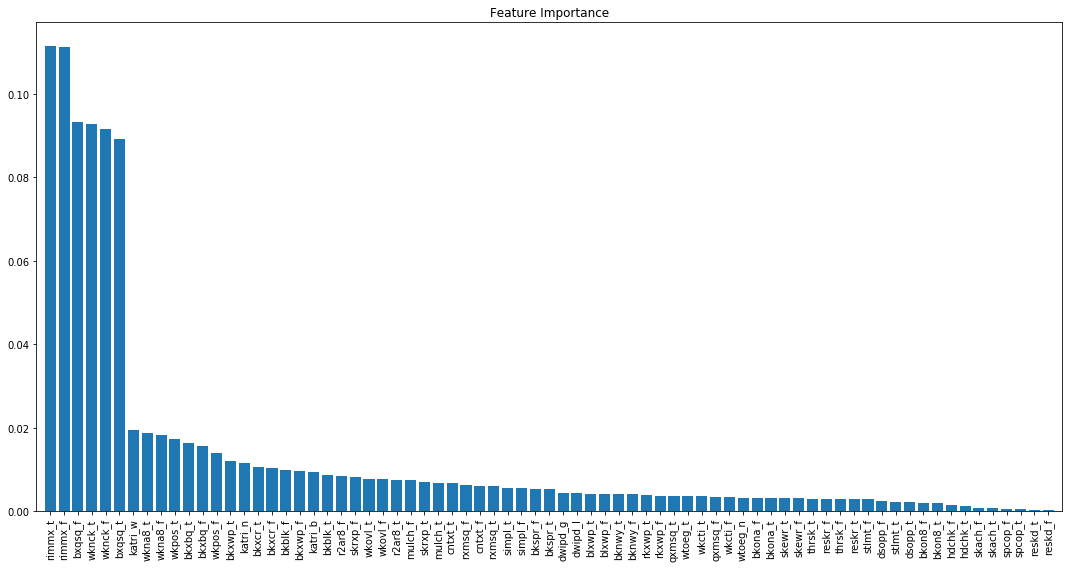

In [21]:
plt.figure(figsize=(15, 8))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X, y)